In [1]:
import pickle

from tqdm import tqdm
from glob import glob

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
def check_key_name(key):
    return 'linear' not in n and 'bn' not in n and 'shortcut.0' not in n

# preparation

In [3]:
USUAL_ELRS = [
    1e-4, 2e-4, 5e-4,
    1e-3, 2e-3, 5e-3,
    1e-2, 2e-2, 5e-2,
    1e-1, 2e-1, 5e-1,
]

EDLRS = [1e-4, 2e-3]

In [4]:
cols = sns.color_palette('gist_rainbow',30)
cols = [cols[0],cols[4],cols[12],cols[18],cols[26]]
sns.set_palette(sns.color_palette(cols))
cols = sns.color_palette(cols)
cols

[(1.0, 0.007419183889772136, 0.0),
 (1.0, 0.706942236354001, 0.0),
 (0.0, 1.0, 0.1054185114906178),
 (0.0, 0.8599744245524292, 1.0),
 (0.546675191815857, 0.0, 1.0)]

In [5]:
EDLRS_paper = EDLRS
ELRS_paper = USUAL_ELRS

fig_shape_x = 6/1.2
fig_shape_y = 3/1.2

# barriers

In [6]:
with open('./resnet18_w64_cifar100_barrier_setups.pkl', 'rb') as f:
    barrier_setups = pickle.load(f)

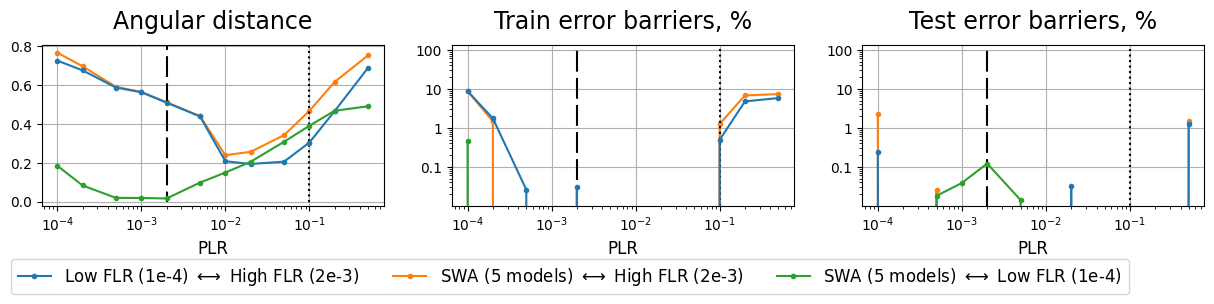

In [10]:
sns.set_palette("tab10")
map_setup_to_label = {
    'interp_drophigh_droplow': 'Low FLR (1e-4) $\longleftrightarrow$ High FLR (2e-3)',
    'interp_swa5_drophigh': 'SWA (5 models) $\longleftrightarrow$ High FLR (2e-3)',
    'interp_swa5_droplow': 'SWA (5 models) $\longleftrightarrow$ Low FLR (1e-4)'
}

fig,ax = plt.subplots(1,3,figsize=(fig_shape_x*3, fig_shape_y/1.2))

for setup in ['interp_drophigh_droplow', 'interp_swa5_drophigh', 'interp_swa5_droplow']:#, 'drop(0.25)-swa(5)drop(0.25)', 'drop(0.01)-swa(5)drop(0.01)']:
    xs = []
    ys = []

    for elr in ELRS_paper:
#         if blr > 0.27:
        xs.append(elr)
        ys.append(barrier_setups[setup][elr]['angle'])

    ax[0].plot(xs, ys, marker='.', label=map_setup_to_label[setup])

map_key_to_label = {
    'loss_barrier': 'train loss barrier',
    'lossts_barrier': 'test loss barrier',
    'trainacc_barrier': 'train accuracy barrier',
    'testacc_barrier': 'test accuracy barrier'
}
i=1
for metrickey in ['trainacc_barrier', 'testacc_barrier']:
    for setup in ['interp_drophigh_droplow', 'interp_swa5_drophigh', 'interp_swa5_droplow']:
        xs = []
        ys = []
        for elr in ELRS_paper:
            xs.append(elr)
            if metrickey == 'trainacc_barrier':
                ys.append(barrier_setups[setup][elr][metrickey]*100)
            else:
                ys.append(barrier_setups[setup][elr][metrickey])
        ax[i].plot(xs, ys, marker='.',label = setup) 
    
    ax[i].set_yscale('log')
    ax[i].set_ylim(0.01,130)
    ax[i].set_yticks([0.1,1,10,100])
    ax[i].set_yticklabels(['0.1','1','10','100'])
    i+=1
        
for i in [0,1,2]:
    ax[i].set_xlabel('PLR',fontsize=12)
    ax[i].set_xscale('log')
    ax[i].grid()

    ylim = ax[i].get_ylim();
    ax[i].plot([2e-3, 2e-3], [0, 110],
              linestyle=(5, (10, 3)), color='black',alpha=1)
#     ax[i].plot([USUAL_ELRS[24], USUAL_ELRS[24]], [0, 110],
#               linestyle=(5, (10, 3)), color='black',alpha=1)
    ax[i].plot([0.1, 0.1], [0, 110],
            'k:',alpha=1)
    ax[i].set_ylim(ylim)
ax[0].set_title('Angular distance',fontsize=17,pad=12)
ax[1].set_title('Train error barriers, %',fontsize=17,pad=12)
ax[2].set_title('Test error barriers, %',fontsize=17,pad=12)


ax[0].legend(loc=(-0.09,-0.55),ncol=3,fontsize=12)

for i in [0,1,2]:
    ax[i].get_lines()[2].set_zorder(4)
    ax[i].get_lines()[0].set_zorder(3)
    ax[i].get_lines()[1].set_zorder(2)
#     for j in [3,4,5]:
#         ax[i].get_lines()[j].set_zorder(5)
plt.subplots_adjust(wspace=0.2,hspace=0.5)

ylim0 = ax[0].get_ylim()
ylim1 = ax[1].get_ylim()
ylim2 = ax[2].get_ylim()
plt.savefig("./rn18c100_practical_geometry.png", bbox_inches='tight', format='png',dpi=512)